In [22]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as pld

In [23]:
df=pd.read_csv('predictive_maintenance_dataset.csv')

In [24]:
df.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [25]:
# Check for missing data
print(df.isnull().sum())


date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64


In [26]:
# Filling missing values using forward fill
df.fillna(method='ffill', inplace=True)


C:\Users\nisha\AppData\Local\Temp\ipykernel_21336\3442248405.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [27]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

# Check for missing values
missing_data = df.isnull().sum()
print("Missing data:\n", missing_data)


Missing data:
 date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64


In [28]:
df.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,2015-01-01,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


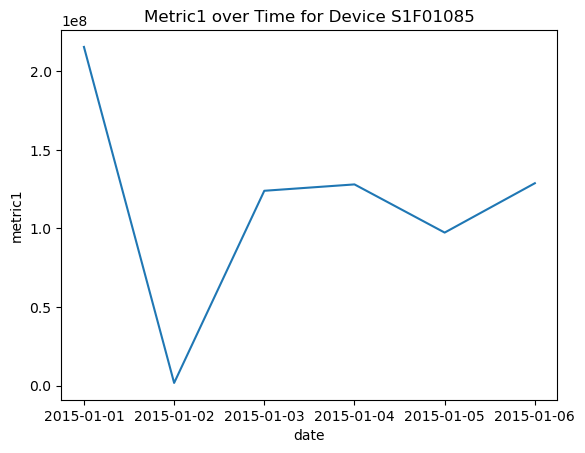

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot metric1 over time for the first device (just an example)
sns.lineplot(x='date', y='metric1', data=df[df['device'] == 'S1F01085'])
plt.title('Metric1 over Time for Device S1F01085')
plt.show()


In [30]:
df.drop(columns='device' , inplace=True)

In [31]:
df

,date,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,2015-01-01,0,215630672,55,0,52,6,407438,0,0,7
1,2015-01-01,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,0,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,0,18310224,0,0,0,10,353705,8,8,0
124490,2015-11-02,0,172556680,96,107,4,11,332792,0,0,13
124491,2015-11-02,0,19029120,4832,0,0,11,350410,0,0,0
124492,2015-11-02,0,226953408,0,0,0,12,358980,0,0,0


In [32]:
from sklearn.preprocessing import StandardScaler

# Select only numerical sensor data (excluding 'failure' and 'date')
sensor_columns = [col for col in df.columns if col not in ['date', 'failure']]
scaler = StandardScaler()
df[sensor_columns] = scaler.fit_transform(df[sensor_columns])


## EDA

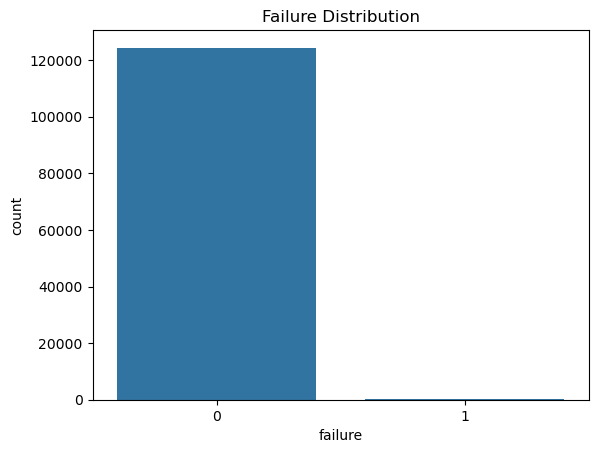

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot of failure occurrences
sns.countplot(x='failure', data=df)
plt.title("Failure Distribution")
plt.show()


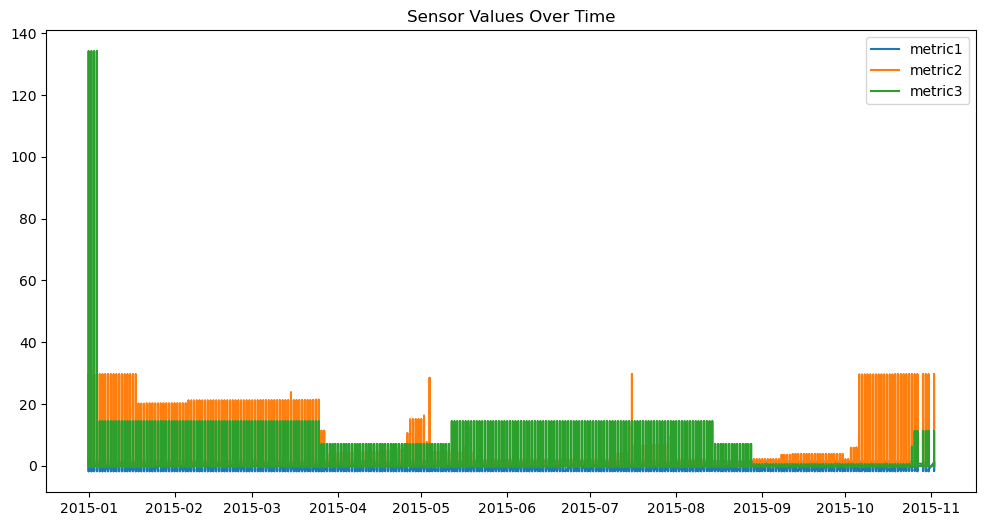

In [34]:
# Plot some sensors over time
plt.figure(figsize=(12, 6))
for sensor in ['metric1', 'metric2', 'metric3']:
    plt.plot(df['date'], df[sensor], label=sensor)
plt.legend()
plt.title("Sensor Values Over Time")
plt.show()


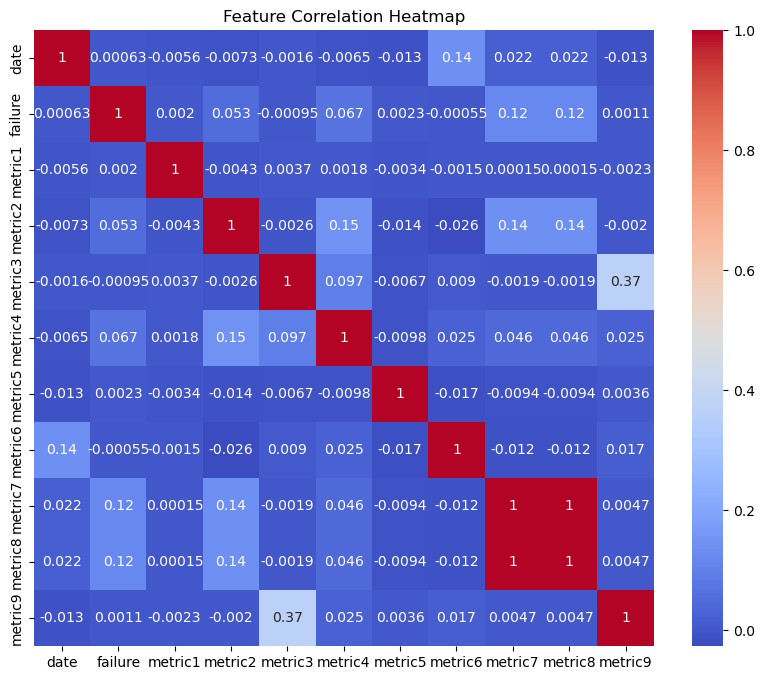

In [35]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [37]:
# Drop unnecessary columns (modify based on dataset)
df.drop(columns=['date'], inplace=True, errors='ignore')  # Ignore if 'date' doesn't exist

# Define features and target
X = df.drop(columns=['failure'])  # Features
y = df['failure']  # Target

# Split data before applying SMOTE (to prevent data leakage)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [47]:
# Apply SMOTE only on training data
smote = SMOTE(sampling_strategy=0.7, random_state=42)  # Make failures 50% of total
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("Before SMOTE:\n", y_train.value_counts())
print("After SMOTE:\n", y_train_smote.value_counts())


Before SMOTE:
 failure
0    99510
1       85
Name: count, dtype: int64
After SMOTE:
 failure
0    99510
1    69657
Name: count, dtype: int64


In [ ]:
# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_smote, y_train_smote)

# Predict on test set
y_pred = model.predict(X_test)


In [46]:
from sklearn.metrics import roc_auc_score

# Print classification report
print(classification_report(y_test, y_pred))

# Calculate ROC-AUC score
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("ROC-AUC Score:", auc)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24878
           1       0.12      0.10      0.11        21

    accuracy                           1.00     24899
   macro avg       0.56      0.55      0.55     24899
weighted avg       1.00      1.00      1.00     24899

ROC-AUC Score: 0.7427780904145563
